In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [2]:
# importing data
card_data = pd.read_csv("C:/datasets/creditcard.csv")
card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
card_data.shape

(284807, 31)

In [4]:
card_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
card_data.groupby("Class").mean()
class_mean = card_data.groupby("Class").mean()
class_mean

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [6]:
card_data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

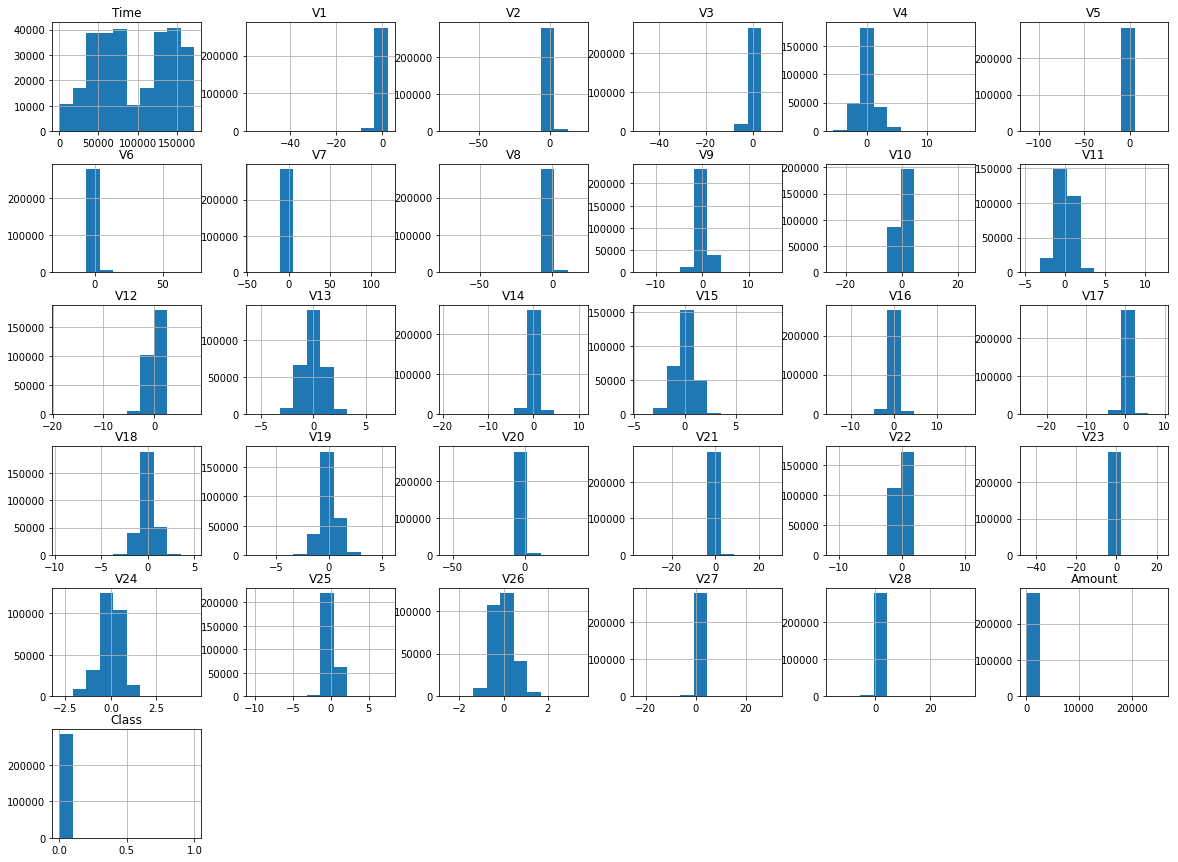

In [7]:
card_data.hist(figsize=(20,15))
plt.show()

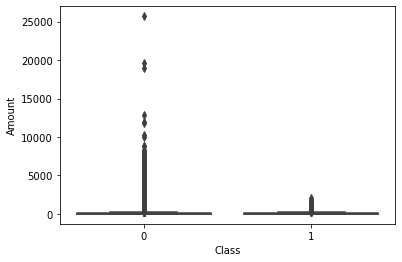

In [8]:
sns.boxplot(x= "Class", y="Amount", data = card_data);

In [9]:
# fraud vs valid transaction

Fraud = card_data[card_data["Class"] == 1]
Valid = card_data[card_data["Class"] == 0]

# fraud percentage 
fraud_percentage = len(Fraud)/len(Valid)
print("Fraud :", len(Fraud))
print("Valid :", len(Valid))
print("fraud percentage: {}".format (len(Fraud)/len(Valid)))

Fraud : 492
Valid : 284315
fraud percentage: 0.0017304750013189597


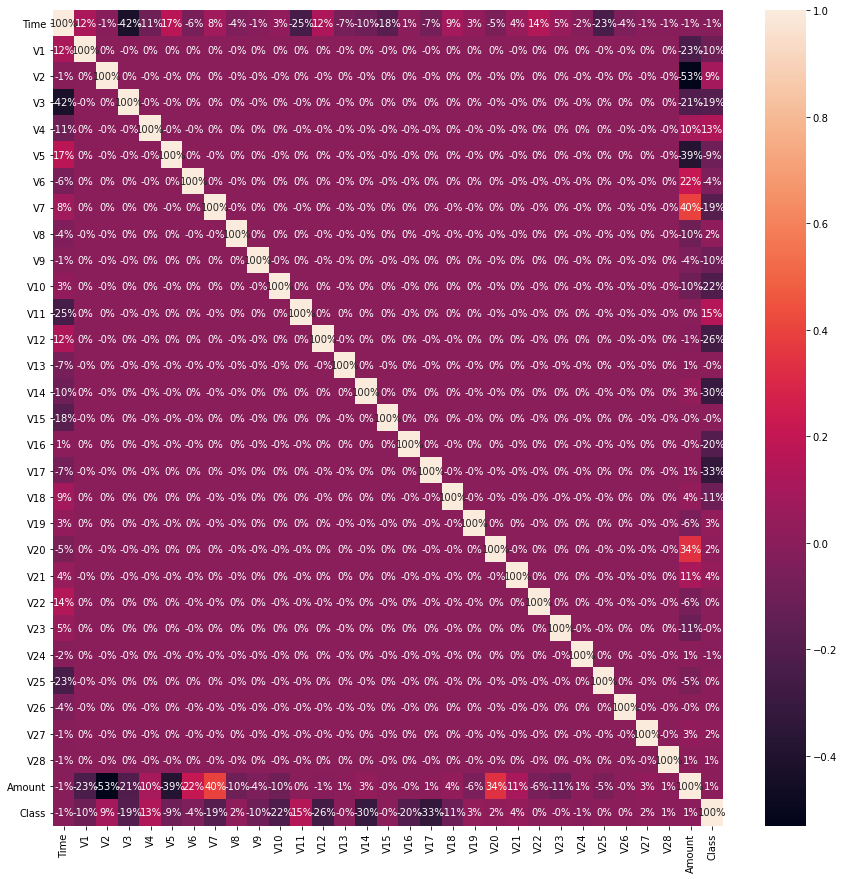

In [10]:
plt.figure(figsize=(15,15))
sns.heatmap(card_data.corr(), annot=True, fmt=".0%");

In [11]:
# Spliting the datasets prior to training

X = card_data.drop("Class", axis=1)
Y = card_data["Class"]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [16]:
# splitting the datasets into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 1)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# Predicting using differnt models

def models(X_train,Y_train):
    #Decision Tree
    Decision_tree = DecisionTreeClassifier(criterion = "entropy")
    Decision_tree.fit(X_train, Y_train)
    
    #Logistic Regression
    log_regression = LogisticRegression()
    log_regression.fit(X_train, Y_train)
    
    #Random forest classifier
    rand_forest = RandomForestClassifier()
    rand_forest.fit(X_train, Y_train)
    
    #SVM
    svm_classifier = svm.SVC(kernel="linear")
    svm_classifier.fit(X_train, Y_train)
    
    
    print("[0]Decision Tree training accuracy : ", Decision_tree.score(X_train, Y_train))
    print("[1]Logistic Regression training accuracy : ", log_regression.score(X_train, Y_train))
    print("[2]Random forest classifier training accuracy : ", rand_forest.score(X_train, Y_train))
    print("[3]SVM classifier training accuracy : ", svm_classifier.score(X_train, Y_train))

    
    return Decision_tree, log_regression, rand_forest, svm_classifier

In [17]:
model = models(X_train, Y_train)

[0]Decision Tree training accuracy :  1.0
[1]Logistic Regression training accuracy :  0.9992714345278588
[2]Random forest classifier training accuracy :  1.0
[3]SVM classifier training accuracy :  0.9993811582435428


In [15]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, model[1].predict(X_test))
confusion_matrix

array([[56865,    10],
       [   39,    48]], dtype=int64)

In [21]:
def F1_score():
    print("F1 score for each model are; ")
    print(" Decision Tree : ", metrics.f1_score(Y_test, model[0].predict(X_test)))
    print(" Logistic Regression : ", metrics.f1_score(Y_test, model[1].predict(X_test)))
    print(" Random forest classifier : ", metrics.f1_score(Y_test, model[2].predict(X_test)))
    print(" SVM classifier : ", metrics.f1_score(Y_test, model[3].predict(X_test)))
    
F1_score()

F1 score for each model are; 
 Decision Tree :  0.735632183908046
 Logistic Regression :  0.6620689655172414
 Random forest classifier :  0.85
 SVM classifier :  0.7560975609756099


In [22]:
# model evaluation table 
algor = ["Decision Tree", "Logistic regression", "Random forest classifier", "SVM classifier"]
accuracy_score = [metrics.accuracy_score(Y_test, model[0].predict(X_test)), metrics.accuracy_score(Y_test, model[1].predict(X_test)), metrics.accuracy_score(Y_test, model[2].predict(X_test)), metrics.accuracy_score(Y_test, model[3].predict(X_test))]
F1_score = [metrics.f1_score(Y_test, model[0].predict(X_test)), metrics.f1_score(Y_test, model[1].predict(X_test)), metrics.f1_score(Y_test, model[2].predict(X_test)), metrics.f1_score(Y_test, model[3].predict(X_test))]
Model_evaluation = pd.DataFrame({"MODEL": algor, "ACCURACY SCORE" : accuracy_score, "F1 SCORE" : F1_score})
Model_evaluation

,MODEL,ACCURACY SCORE,F1 SCORE
0,Decision Tree,0.999192,0.735632
1,Logistic regression,0.999140,0.662069
2,Random forest classifier,0.999579,0.850000
3,SVM classifier,0.999298,0.756098
